# Cleaning Data

<br>in this notebook we will clean data and unify job posts in order to get better analysis results <br>
cleaning `Job Title` steps include:

- remove hash sign from hashtags.
- remove leading and trailing spaces.
- remove useless punctuation.
- unify job titles ex. `(reactjs , react-js, react js, react.js) -> react-js`.
- getting higher level job title, ex. `ios developer -> mobile developer` and `laravel developer -> back-end developer`.
- extract experience level from job title (senior, mid, junior).


In [2]:
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud


In [121]:
# reading data
data = pd.read_csv("../data/data_v5.4.csv")


In [122]:
def clean_text(text: str) -> str:
    # remove hashtag, colon, leading and trailing spaces
    # we are using a regular expression to remove hash signs
    # to avoid removing the # in C# jobs
    if text is np.nan:
        return text
    hashtag_regex = re.compile(r"\B#")
    text = text.lower()
    text = hashtag_regex.sub("", text)
    text = text.replace(":", "")
    text = text.strip()
    return text


checking data before cleaning it


In [123]:
data.job_title.nunique()


427

there's 427 unique job titles in dataset, we will try to reduce that number


In [124]:
# cleaning job title column
data.job_title = data.job_title.apply(lambda title: clean_text(title))
data.job_title.nunique()


366

In [125]:
# craft position from the job post and remove it from the title

experience = data.job_title.apply(
    lambda x: np.nan
    if x is np.nan
    else "senior"
    if "senior" in x
    else "mid"
    if "mid" in x
    else "junior"
    if "junior" in x
    else np.nan
)
data["abstract_title"] = data.job_title.apply(
    lambda x: x.replace("senior", "").replace("junior", "").replace("mid", "").strip()
    if x is not np.nan
    else np.nan
)
print(data.abstract_title.nunique())


341


removing experience level from job title decreased unique job titles by 25


In [126]:
def abstract_job_title(title):
    if title is np.nan:
        return title
    abstract_titles = {
        "full-stack": [
            "full stack",
            "fullstack",
            "full-stack",
            "(laravel + vue.js)",
            "(laravel+vue.js)",
            "flutter / laravel developer",
            "laravel and reactjs",
        ],
        "front-end": [
            "front end",
            "frontend",
            "front-end",
            "react js developer",
            "react.js developer",
            "reactjs developer",
            "vue.js developer",
            "vue developer",
            "front developer",
            "angular developers",
        ],
        "back-end": [
            "back end",
            "backend",
            "back_end",
            "back-end",
            "laravel developer",
            "laravel php developer",
        ],
        "ui/ux designer": ["ui/ux", "ux/ui", "ui ", "ui\\ux", "ui-ux"],
        ".net developer": [".net core developer", ".net developer", ".net server"],
        "mobile app developer": [
            "mobile app",
            "mobile ",
            "moobile app",
            "(mobile)",
            "flutter developer",
            "ios developer",
            "android developer",
        ],
        "motion designer": [
            "motion graphic designer",
            "video graphic designer",
            "motion graphics",
        ],
        "graphic designer": [
            "graphic designer",
            "graphic_designer",
            "graphic designers",
        ],
        "social media manager": [
            "social media",
            "youtube channels manger",
            "blog manager",
        ],
        "sales": ["sales"],
        "web developer": [
            "web developer",
            "web_developer",
            "web/app developer",
            "website developer",
            "_web_developer",
            "web designer",
            "web application developer",
            "web developers",
        ],
        "software developer": [
            "software developer",
            "software developers",
            "softwaredeveloper",
        ],
        "digital marketing": [
            "digital marketing manager",
            "digital marketer",
            "digital marketing executives",
            "manager of marketing",
            "marketing manager",
        ],
        "network and system administrator": [
            "network & system administrator",
            "network and system administrator",
            "network & systems administrator",
            "network and system auditor",
            "networks & servers specialist",
        ],
        "accountant": [
            "accounting manager",
            "accountant",
            "accountants",
            "chief accountant",
        ],
        "quality assurance": [
            "quality assurance",
            "software quality",
            "qa engineer",
            "software_qa_tester",
            "software qa tester",
            "software_manual_tester",
            "software_tester",
            "software test engineer",
            "qa tester",
        ],
        "human resources": [
            "hr officer",
            "hr specialist",
            "hr recruiter",
            "human_resources",
            "human resources",
        ],
        "content creator": ["content", "copy writer", "news editor"],
        "secretary": ["secretary"],
    }
    sub = title
    for k, v in abstract_titles.items():
        for kw in v:
            if kw in sub:
                sub = k
                # print(sub)
    return sub


In [127]:
data.abstract_title.apply(abstract_job_title).nunique()


170

In [128]:
data["abstract_title"] = data.abstract_title.apply(abstract_job_title)
data["experience"] = experience


In [129]:
data.shape


(877, 19)

In [130]:
data.head()


,id,date,photo,text,text_entities,raw_text,type,ocr_res,full_text,description,job_title,company_name,salary,location,job_type,years_of_experience,skills,abstract_title,experience
0,1567,2022-01-02 13:46:28,photos/photo_1205@02-01-2022_13-46-28.jpg,"['Job Title:', {'type': 'hashtag', 'text': '#s...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#senior and a junior #developer\n \n...,job_post,We are on the hunt for a JUNIOR/SENIOR Develop...,Job Title:#senior and a junior #developer\n \n...,\nJob Title: Junior/Senior Developer\nCompany ...,junior/senior developer,NaN,NaN,NaN,full-time,extensive,"php, laravel, sql, javascript, html5, css, boo...",/ developer,senior
1,1568,2022-01-03 11:09:36,photos/photo_1206@03-01-2022_11-09-36.jpg,"['Job Title:', {'type': 'hashtag', 'text': '#c...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#cashier\nJob Type: #full_time\n \nش...,job_post,Jolgi Job Type:Full Time Send your CV to m.jaw...,Job Title:#cashier\nJob Type: #full_time\n \nش...,\nJob Title: Cashier\nCompany Name: Euroline-R...,cashier,euroline-rent,NaN,damascus,full time,3,"english language, jobseekers, jobseeker, inter...",cashier,NaN
2,1569,2022-01-03 14:28:11,photos/photo_1207@03-01-2022_14-28-11.jpg,"['Company: ', {'type': 'hashtag', 'text': '#Na...","[{'type': 'plain', 'text': 'Company: '}, {'typ...",Company: #National_Technology_Group #NTG)\nJob...,job_post,JOIN OURTEAM We're Hiring. NET DEVELOPER +lyea...,Company: #National_Technology_Group #NTG)\nJob...,\nJob title: .NET Developer\nCompany Name: Nat...,.net developer,national technology group (ntg),NaN,damascus,full time onsite,1,"asp core, reactjs",.net developer,NaN
3,1570,2022-01-03 17:12:13,photos/photo_1208@03-01-2022_17-12-13.jpg,"['Job title: ', {'type': 'hashtag', 'text': '#...","[{'type': 'plain', 'text': 'Job title: '}, {'t...",Job title: #Employees for Operations Departmen...,job_post,Job Vacancy Employees for Operations Departmen...,Job title: #Employees for Operations Departmen...,\nCompany Name: None\nSalary: None\nYears of E...,operations department,NaN,NaN,on: #Damascus,#Full_Time,NaN,"perfect knowledge & use for english, basic com...",operations department,NaN
4,1571,2022-01-03 19:16:11,photos/photo_1209@03-01-2022_19-16-11.jpg,"[{'type': 'link', 'text': 'https://www.faceboo...","[{'type': 'link', 'text': 'https://www.faceboo...",https://www.facebook.com/384708578676644/posts...,link,Jmloi AWASOL Developer Remotely Send your CV t...,https://www.facebook.com/384708578676644/posts...,\nJob Title: AWASOL Developer \nCompany Name: ...,awasol developer,smartech-sy,NaN,remotely,NaN,NaN,NaN,awasol developer,NaN


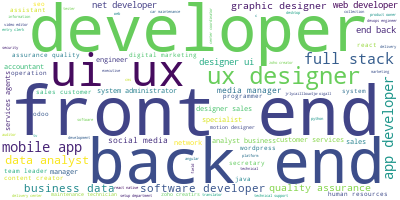

In [131]:
# creating word cloud to form a higher understanding of titles
long_string = ",".join(
    list(
        data.loc[data.abstract_title.notna()]
        .abstract_title.apply(abstract_job_title)
        .values
    )
)

wordcloud = WordCloud(
    background_color="white", max_words=5000, contour_width=3, contour_color="steelblue"
)

wordcloud.generate(long_string)

wordcloud.to_image()


as the word cloud shows, **front-end** , **back-end**, **ui-ux designer** and **full-stack** are the top words in job posts title <br>

we can see also keywords such as software developer, graphic designer, and mobile app


In [132]:
data.to_csv("../data/data_v6.csv", index=False)


### Conclusion

- job titles were cleaned
- new _experience_ column was created
- new _abstract_title_ column was created


## Cleaning Job Columns
data needs some further cleaning steps, the info extracted using ChatGPT is not ready to be used in our analysis <br>
the following columns should be cleaned and unified:
- Company Name (remove punctuation and names that we know are not official names)
- Job title (job titles that belong to the same group should be together)
- Salary column
- Job Type
- Location
- Years of experience


## Cleaning **Company Name** column

In [402]:
data = pd.read_csv("../data/data_v6.csv")

In [403]:
print(f"Number of non empty Company Names: {data.company_name.notna().sum()}")
print(f"Number of Unique Company Names: {data.company_name.nunique()}")

Number of non empty Company Names: 701
Number of Unique Company Names: 301


In [404]:
def fix_company_name(text):
    if text is np.nan:
        return text
    
    text = re.sub(r"#|(tawasol(_job)?)|none" , "" , text)
    text = text.lower().strip()

    return text


data.company_name.apply(fix_company_name).nunique()

258

In [405]:
data.company_name = data.company_name.apply(fix_company_name)

In [311]:
data.to_csv("../data/data_v6.6.csv",index=False)

we cannot do much in here because company names are **Named Entities** so it can take any value, especially when we are analyzing job posts in an Arabian market, arabic company names can be bizzar. <br>
but using simple operations we managed to decrease the unique names from 301 to 258

## Fixing Salary Column

In [371]:
data = pd.read_csv("../data/data_v6.6.csv")


In [406]:
data.salary.nunique()

101

In [407]:
def fix_salary(salary):
    if salary is np.nan:
        return salary

    if not re.search("\d+", salary):
        return np.nan

    salary = re.sub(r"syp|sp|l\.s|syrian lira|syrian pound(s)?|s\.p", " SYP", salary)
    salary = re.sub(r"dollar|usd|\$|\ds$", " USD", salary)
    salary = re.sub(r",|#|~|'|\.|:", "", salary)
    salary = re.sub(r" million(s)?|(?<=\d)m", "000000", salary)
    salary = re.sub(r"(?<=\d)\s+(?=\d{3}\s)", "", salary)
    salary = re.sub(r"per month|starting from|up to", "", salary)
    salary = salary.strip()
    salary = re.sub(r"(?<=0{3})$", " SYP", salary)
    salary = re.sub(r"(?<=0{2})$", " USD", salary)
    salary = re.sub(r"SYP\s+", "", salary)
    salary = re.sub("to|-|/", " - ", salary)
    salary = re.sub(r"\s+", " ", salary)
    salary = re.sub(r"(?<=^\d{2})\s(?=-)", "00000 ", salary)
    salary = re.sub(r"(?<=^\d{1})\s(?=-)", "000000 ", salary)

    if "SYP" not in salary and "USD" not in salary:
        return np.nan

    match = re.findall("\d+", salary)
    if "SYP" in salary:
        for item in match:
            if int(item) < 100000:
                salary = np.nan
                break

    if "USD" in match:
        for item in match:
            if int(item) > 10000:
                salary = np.nan
                break

    if match and len(match) > 2:
        salary = np.nan

    return salary


In [408]:
data.salary = data.salary.apply(fix_salary)
print(data.salary.nunique())

27


In [377]:
data.to_csv("../data/data_v6.7.csv" , index=False)

## Fixing location column
we will use spacy library to detect geolaction named entities from text


In [380]:
data = pd.read_csv("../data/data_v6.7.csv")


In [409]:
data.location.nunique()


106

In [410]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [411]:
def extract_location(location):
    if location == np.nan:
        return location
    loc = ""

    if "remote" in location:
        loc = "remotely"

    doc = nlp(location)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            if loc == "remotely":
                loc = "(hybrid) remotely"
            loc += " " + ent.text

    return loc.strip().lower()

In [412]:
data.location = data.location.astype("str").apply(extract_location)


In [413]:
data.location.unique()


array(['nan', 'damascus', 'remotely', '', '(hybrid) remotely damascus',
       'qassa damascus syria', '(hybrid) remotely istanbul turkey',
       'iraq', 'damascus syria', 'syria', 'dubai', 'lebanon',
       'syria damascus', 'damascus baghdad', 'damascus latakia',
       'damascus adnan', '(hybrid) remotely lebanon syria egypt turkey',
       'germany', 'damascus syria syria', 'damascus dubai baghdad'],
      dtype=object)

In [395]:
data.to_csv("../data/data_v6.8.csv", index=False)


### Fixing Years of Experience column


In [414]:
data.years_of_experience.nunique()


134

In [415]:
def fix_experience_years(text):
    if text is np.nan:
        return text
    numbers = {
        "one ": "1 ",
        "two ": "2 ",
        "three": "3",
        "four ": "4 ",
        "five ": "5 ",
        "six ": "6 ",
        "seven ": "7 ",
        "eight ": "8 ",
        "nine ": "9 ",
        "ten ": "10 ",
    }
    numbers_re = re.compile("|".join(numbers.keys()))

    text = numbers_re.sub(lambda x: numbers[x.group()], text)
    text = re.sub("fresh ", "0 year", text)

    if not re.search("\d", text):
        return np.nan

    match = re.findall(r"\b\d+\b", text)
    if match:
        numbers_set = np.array(list(set(match)), dtype="int32")
        return np.floor(numbers_set.mean())
    return np.nan

In [416]:
data["avg_exp_years"] = data.years_of_experience.apply(fix_experience_years)


In [417]:
data.avg_exp_years.nunique()

13

In [216]:
data.to_csv("../data/data_v6.4.csv", index=False)


### Fixing Job Type column

In [418]:
data.job_type.nunique()

116

In [419]:
def fix_job_type(text):
    if text is np.nan:
        return text

    text = text.lower().strip()
    text = re.sub(r"#|_", "", text)
    text = re.sub(r"(full time)|(fulltime)|(full_time)", "full-time", text)
    text = re.sub(r"(part time)|(parttime)|(part_time)", "part-time", text)

    res = ""
    if "full-time" in text:
        res += "full-time "
    if "part-time" in text:
        res += "part-time "
    if "freelance" in text:
        res += "freelance"
    if "train" in text:
        res += "training "
    if "free time" in text or "task bas" in text:
        res += "task based "

    if res == "":
        return np.nan

    return res.strip()


In [420]:
data['job_type'] = data.job_type.apply(fix_job_type)

In [421]:
data.job_type.nunique()

7

In [279]:
data.to_csv("../data/data_v6.5.csv" , index=False)

## Summing UP

In [424]:
data.to_csv("../data/data_v6.9.csv" , index=False)

In [3]:
dirty = pd.read_csv("../data/data_v5.4.csv")
cleaned = pd.read_csv("../data/data_v6.9.csv")

In [5]:
cols = ['job_title', 'company_name','salary', 'location', 'job_type', 'years_of_experience', 'skills',
       'abstract_title', 'experience', 'avg_exp_years']
dirty = dirty[cols[:7]]
cleaned = cleaned[cols]

In [6]:
dirty.head()

,job_title,company_name,salary,location,job_type,years_of_experience,skills
0,junior/senior developer,NaN,NaN,NaN,full-time,extensive,"php, laravel, sql, javascript, html5, css, boo..."
1,cashier,euroline-rent,NaN,damascus,full time,3,"english language, jobseekers, jobseeker, inter..."
2,.net developer,national technology group (ntg),NaN,damascus,full time onsite,1,"asp core, reactjs"
3,operations department,NaN,NaN,on: #Damascus,#Full_Time,NaN,"perfect knowledge & use for english, basic com..."
4,awasol developer,smartech-sy,NaN,remotely,NaN,NaN,NaN


In [7]:
cleaned.head()

,job_title,company_name,salary,location,job_type,years_of_experience,skills,abstract_title,experience,avg_exp_years
0,junior/senior developer,NaN,NaN,NaN,full-time,extensive,"php, laravel, sql, javascript, html5, css, boo...",/ developer,senior,NaN
1,cashier,euroline-rent,NaN,damascus,full-time,3,"english language, jobseekers, jobseeker, inter...",cashier,NaN,3.0
2,.net developer,national technology group (ntg),NaN,damascus,full-time,1,"asp core, reactjs",.net developer,NaN,1.0
3,operations department,NaN,NaN,damascus,full-time,NaN,"perfect knowledge & use for english, basic com...",operations department,NaN,NaN
4,awasol developer,smartech-sy,NaN,remotely,NaN,NaN,NaN,awasol developer,NaN,NaN


## Conclusion
in this notebook we applied several cleaning steps on our data and that resulted in the following:

- **abstract_title** column was created
- **experience** column was created with following values (senior, mid, junior)
- **avg_experience_years** column was created
- **company_name, salary, location, job_type** columns were cleaned inplace
- **job_title, years_of_experience and skills** are still the same

<table>
<tr><th>NaN Count </th><th>Unique Count</th></tr>
<tr><td>

| | Original Dataframe | Cleaned |
|----------|----------|----------|
| job_title     | 45 | 45 |
| company_name  | 176 | 247 |
| salary        | 696 | 833 |
| location      | 196 | 277 |
| job_type      | 132 | 226 |
| years_of_experience| 482 | 482 |
| skills        | 238 | 238 |
| abstract_title| - | 45 |
| experience    | - | 794 |
| avg_exp_years | - | 538 |

</td><td>

| | Original Dataframe | Cleaned |
|----------|----------|----------|
| job_title     | 427 | 366 |
| company_name  | 301 | 257 |
| salary        | 101 | 27 |
| location      | 106 | 18 |
| job_type      | 116 | 7 |
| years_of_experience| 134 | 134 |
| skills        | 510 | 510 |
| abstract_title| - | 170 |
| experience    | - | 3 |
| avg_exp_years | - | 13 |

</td></tr> </table>
